In [1]:
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis (EDA): 
Let's perform an EDA to understand the distribution, relationships, and outliers in The data.

### Read the second dataset: 

In [3]:
second_df = pd.read_csv("data2/property_prices.csv")

This is it:

In [4]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,NaN,NaN,145 502,1 675,189 050,1 756,1 745,13.8.2024
1,Банишора,49 138,1 134,104 500,1 691,142 310,1 503,1 611,13.8.2024
2,Белите брези,38 000,826,82 365,1 157,115 805,1 085,1 157,13.8.2024
3,Бенковски,NaN,NaN,85 262,1 511,118 750,1 250,1 351,13.8.2024
4,Борово,49 400,1 045,89 774,1 222,138 890,1 426,1 232,13.8.2024
...,...,...,...,...,...,...,...,...,...
1745,с. Лозен,41 956,762,53 018,762,89 849,834,762,11.1.2022
1746,с. Мировяне,NaN,NaN,47 500,863,NaN,NaN,863,11.1.2022
1747,с. Мърчаево,NaN,NaN,26 600,266,35 862,297,297,11.1.2022
1748,с. Панчарево,NaN,NaN,76 660,963,131 779,1 132,1 173,11.1.2022


#### Take a closer look at the dataset:

In [7]:
second_df.shape

(1750, 9)

It has 1750 observations and 9 features.

In [8]:
second_df.describe().T

,count,unique,top,freq
Район,1750,160,7-ми 11-ти километър,12
Едностайни - цена,1305,595,49 400,40
Едностайни - €/кв.м,1305,632,1 176,20
Двустайни - цена,1614,964,66 500,34
Двустайни - €/кв.м,1614,818,1 425,17
Тристайни - цена,1636,984,114 000,29
Тристайни - €/кв.м,1636,839,1 254,26
Общо - €/кв.м,1750,886,950,23
Дата,1750,12,23.4.2024,150


In [9]:
second_df.columns

Index(['Район', 'Едностайни - цена', 'Едностайни - €/кв.м', 'Двустайни - цена',
       'Двустайни - €/кв.м', 'Тристайни - цена', 'Тристайни - €/кв.м',
       'Общо - €/кв.м', 'Дата'],
      dtype='object')

In [10]:
second_df.dtypes

Район                  object
Едностайни - цена      object
Едностайни - €/кв.м    object
Двустайни - цена       object
Двустайни - €/кв.м     object
Тристайни - цена       object
Тристайни - €/кв.м     object
Общо - €/кв.м          object
Дата                   object
dtype: object

How we see in this dataset we have NaN values. 

First, we'll want to convert the columns containing numerical data from object (string) to appropriate numerical types (e.g., float). This conversion is necessary for performing any numerical operations or analysis. And next we will fill the NaN values with the median.

In [11]:
numeric_columns = [
    'Едностайни - цена', 
    'Едностайни - €/кв.м', 
    'Двустайни - цена', 
    'Двустайни - €/кв.м', 
    'Тристайни - цена', 
    'Тристайни - €/кв.м', 
    'Общо - €/кв.м'
]

def convert_dtypes(df, numeric_columns):
    for col in df:
        if col in numeric_columns:
            df[col] = df[col].str.replace(r'\D', '', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')

            median_price = df[col].median()

            df[col].fillna(round(median_price, 0), inplace=True)
            
        if col == 'Дата':
            df[col] = pd.to_datetime(df[col], dayfirst=True)
    return df 

second_df = convert_dtypes(second_df, numeric_columns)

In [12]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,52686.0,1176.0,145502.0,1675.0,189050.0,1756.0,1745,2024-08-13
1,Банишора,49138.0,1134.0,104500.0,1691.0,142310.0,1503.0,1611,2024-08-13
2,Белите брези,38000.0,826.0,82365.0,1157.0,115805.0,1085.0,1157,2024-08-13
3,Бенковски,52686.0,1176.0,85262.0,1511.0,118750.0,1250.0,1351,2024-08-13
4,Борово,49400.0,1045.0,89774.0,1222.0,138890.0,1426.0,1232,2024-08-13
...,...,...,...,...,...,...,...,...,...
1745,с. Лозен,41956.0,762.0,53018.0,762.0,89849.0,834.0,762,2022-01-11
1746,с. Мировяне,52686.0,1176.0,47500.0,863.0,134900.0,1330.0,863,2022-01-11
1747,с. Мърчаево,52686.0,1176.0,26600.0,266.0,35862.0,297.0,297,2022-01-11
1748,с. Панчарево,52686.0,1176.0,76660.0,963.0,131779.0,1132.0,1173,2022-01-11


Now we see the prices are filled and formated.

Check the data types again:

In [13]:
second_df.dtypes

Район                          object
Едностайни - цена             float64
Едностайни - €/кв.м           float64
Двустайни - цена              float64
Двустайни - €/кв.м            float64
Тристайни - цена              float64
Тристайни - €/кв.м            float64
Общо - €/кв.м                   int64
Дата                   datetime64[ns]
dtype: object

Check the format of the "Дата" column:

In [16]:
second_df["Дата"]

0      2024-08-13
1      2024-08-13
2      2024-08-13
3      2024-08-13
4      2024-08-13
          ...    
1745   2022-01-11
1746   2022-01-11
1747   2022-01-11
1748   2022-01-11
1749   2022-01-11
Name: Дата, Length: 1750, dtype: datetime64[ns]

In [17]:
second_df.isna().sum()

Район                  0
Едностайни - цена      0
Едностайни - €/кв.м    0
Двустайни - цена       0
Двустайни - €/кв.м     0
Тристайни - цена       0
Тристайни - €/кв.м     0
Общо - €/кв.м          0
Дата                   0
dtype: int64

All NaNs have been successfully replaced.

### Let's plot the prices over time for each apartment type:

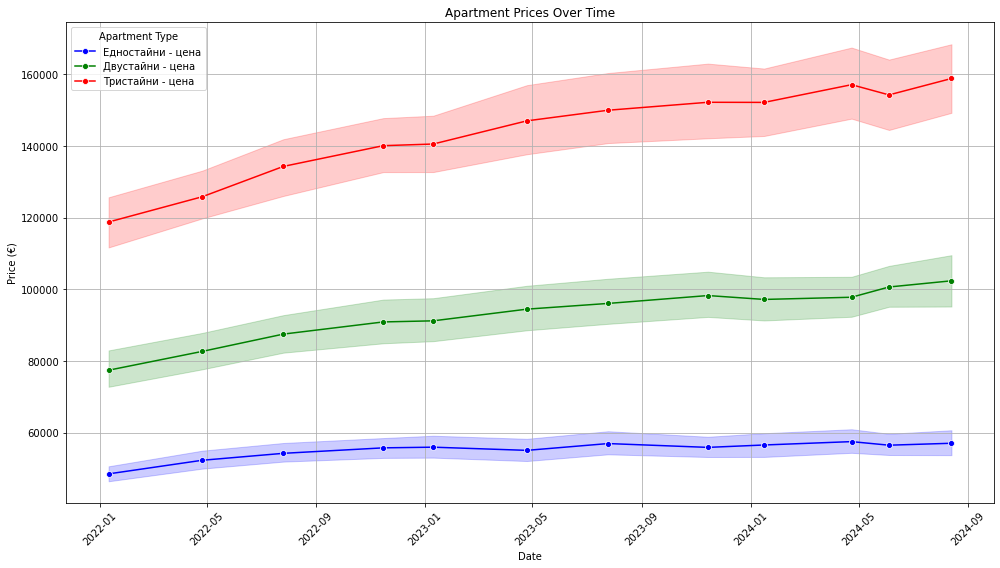

In [36]:
plt.figure(figsize=(14, 8))

# Plot the prices over time for each type of apartment
sns.lineplot(x='Дата', y='Едностайни - цена', data=second_df, marker='o', label='Едностайни - цена', color='blue')
sns.lineplot(x='Дата', y='Двустайни - цена', data=second_df, marker='o', label='Двустайни - цена', color='green')
sns.lineplot(x='Дата', y='Тристайни - цена', data=second_df, marker='o', label='Тристайни - цена', color='red')

plt.title('Apartment Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend(title='Apartment Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Another plot:

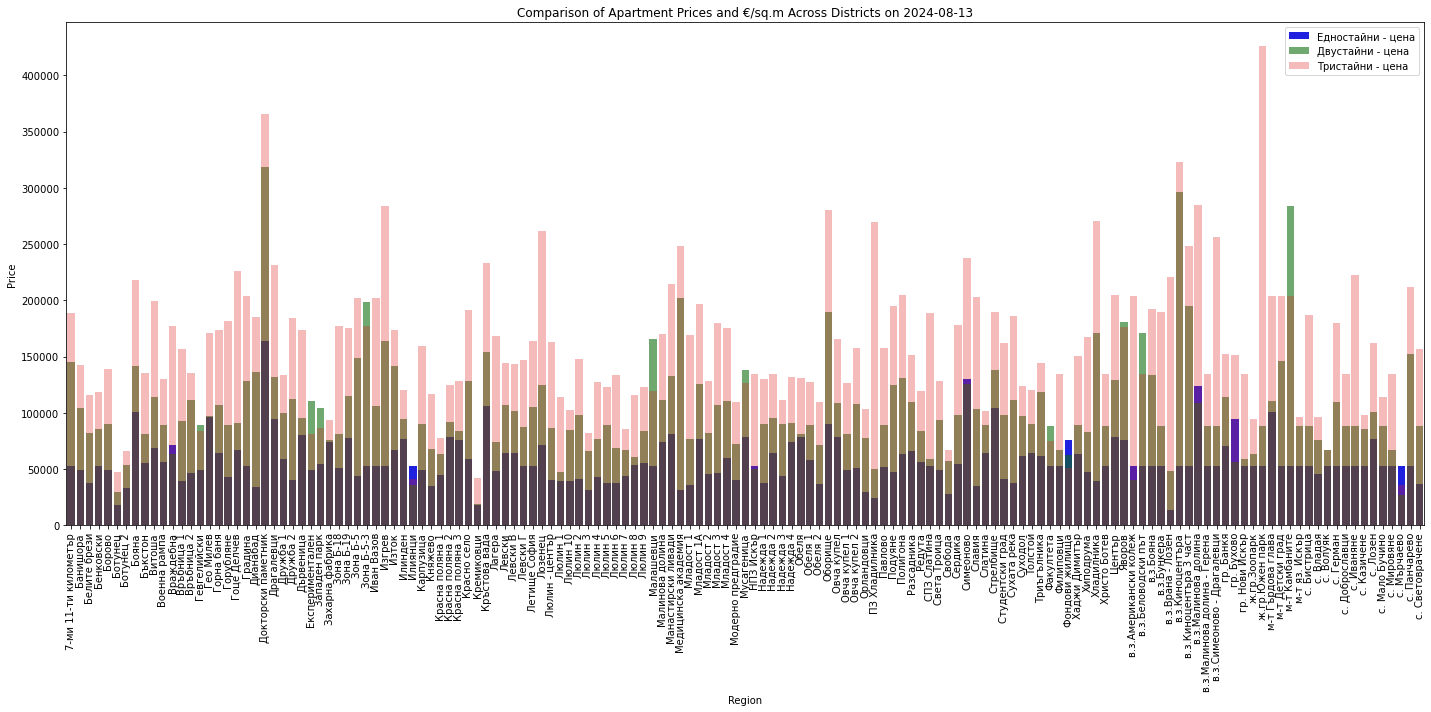

In [42]:
# Filter data by a specific date 
date_filter = '2024-08-13'
filtered_df = second_df[second_df['Дата'] == date_filter]

plt.figure(figsize=(20, 10))

# Create bar plot for the prices
sns.barplot(x='Район', y='Едностайни - цена', data=filtered_df, color='blue', label='Едностайни - цена')
sns.barplot(x='Район', y='Двустайни - цена', data=filtered_df, color='green', label='Двустайни - цена', alpha=0.6)
sns.barplot(x='Район', y='Тристайни - цена', data=filtered_df, color='red', label='Тристайни - цена', alpha=0.3)

plt.xticks(rotation=90)
plt.title(f'Comparison of Apartment Prices and €/sq.m Across Districts on {date_filter}')
plt.ylabel('Price')
plt.xlabel('Region')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

How many unique regions we have in the dataset:

In [21]:
len(second_df['Район'].unique())

160

And which are thay:

In [22]:
second_df['Район'].unique()

array(['7-ми 11-ти километър', 'Банишора', 'Белите брези', 'Бенковски',
       'Борово', 'Ботунец', 'Ботунец 2', 'Бояна', 'Бъкстон', 'Витоша',
       'Военна рампа', 'Враждебна', 'Връбница 1', 'Връбница 2',
       'Гевгелийски', 'Гео Милев', 'Горна баня', 'Горубляне',
       'Гоце Делчев', 'Градина', 'Дианабад', 'Докторски паметник',
       'Драгалевци', 'Дружба 1', 'Дружба 2', 'Дървеница',
       'Експериментален', 'Западен парк', 'Захарна фабрика', 'Зона Б-18',
       'Зона Б-19', 'Зона Б-5', 'Зона Б-5-3', 'Иван Вазов', 'Изгрев',
       'Изток', 'Илинден', 'Илиянци', 'Карпузица', 'Княжево',
       'Красна поляна 1', 'Красна поляна 2', 'Красна поляна 3',
       'Красно село', 'Кремиковци', 'Кръстова вада', 'Лагера', 'Левски',
       'Левски В', 'Левски Г', 'Летище София', 'Лозенец',
       'Люлин - център', 'Люлин 1', 'Люлин 10', 'Люлин 2', 'Люлин 3',
       'Люлин 4', 'Люлин 5', 'Люлин 6', 'Люлин 7', 'Люлин 8', 'Люлин 9',
       'Малашевци', 'Малинова долина', 'Манастирски ливади',
 

In [23]:
second_df['Едностайни - цена'].max()

180500.0

In [24]:
top_5_rows = second_df.nlargest(5, 'Едностайни - цена')  
top_5_rows

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
168,Докторски паметник,180500.0,4512.0,323000.0,3867.0,394250.0,3657.0,3779,2024-06-04
316,Докторски паметник,180500.0,4512.0,280250.0,3932.0,394250.0,3562.0,3895,2024-04-23
21,Докторски паметник,163400.0,4085.0,318250.0,4432.0,365750.0,3602.0,3735,2024-08-13
559,Яворов,152000.0,3800.0,165300.0,2405.0,204250.0,2389.0,2406,2024-01-16
1344,Докторски паметник,142500.0,4750.0,242231.0,4115.0,285000.0,3585.0,3762,2022-07-26
